In [2]:
library(ggplot2)
library(qvalue)
library(cowplot)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************



In [3]:
df_coloc = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC.csv", row.names=1)
# df_coloc = read.csv("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/coloc_GxC.csv", row.names=1)

df_coloc$snp_id = gsub(".*-","",df_coloc$eqtl)
df_coloc

gene,label,eqtl,PP4,study_id,celltype_tissue,ensembl_gene_id,snp_id
ATG10,7,ATG10-5_81395824_T_G,0.8773539,GCST006572,DA_D30,ENSG00000152348,5_81395824_T_G
ATG10,7,ATG10-5_81395824_T_G,0.5351271,GCST006572,DA_D52_ROT,ENSG00000152348,5_81395824_T_G
ATG10,7,ATG10-5_81395824_T_G,0.8461358,GCST006572,DA_D52_NONE,ENSG00000152348,5_81395824_T_G
CHRNA3,10,CHRNA3-15_78849034_T_C,0.5748824,SCZ2,DA_D52_NONE,ENSG00000080644,15_78849034_T_C
EIF5A,7,EIF5A-17_7207964_A_C,0.5258434,NEALE2_6138_2,DA_D52_ROT,ENSG00000132507,17_7207964_A_C
EIF5A,7,EIF5A-17_7207964_A_C,0.5236645,NEALE2_6138_2,DA_D52_NONE,ENSG00000132507,17_7207964_A_C
GALNT10,10,GALNT10-5_153526051_G_A,0.9802572,GCST005232,DA_D30,ENSG00000164574,5_153526051_G_A
GALNT10,10,GALNT10-5_153526051_G_A,0.9303400,GCST005232,DA_D52_ROT,ENSG00000164574,5_153526051_G_A
GALNT10,10,GALNT10-5_153526051_G_A,0.9807478,GCST005232,DA_D52_NONE,ENSG00000164574,5_153526051_G_A
MAPT-AS1,0,MAPT.AS1-17_43925297_C_T,0.5093034,NEALE2_1970,DA_D30,ENSG00000264589,17_43925297_C_T


In [4]:
genes = as.character(unique(df_coloc$ensembl_gene_id))

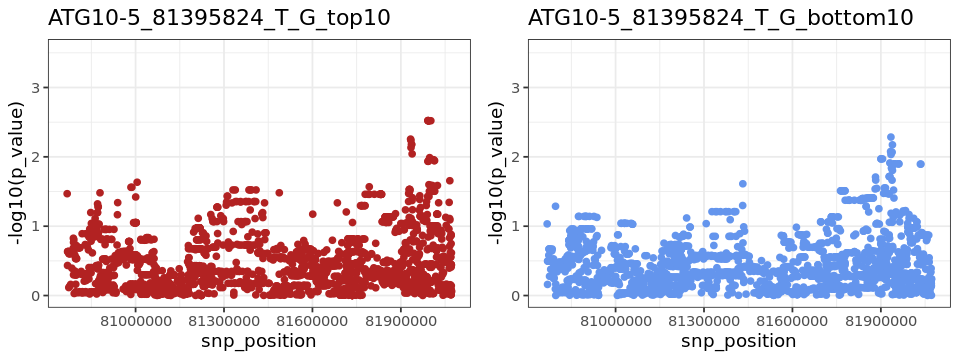

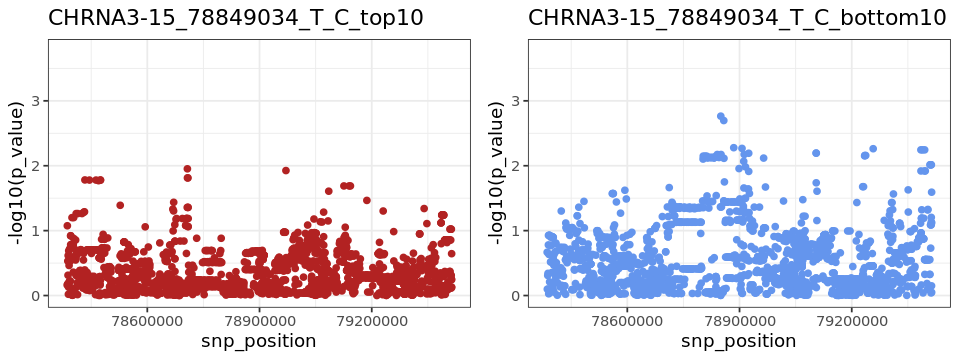

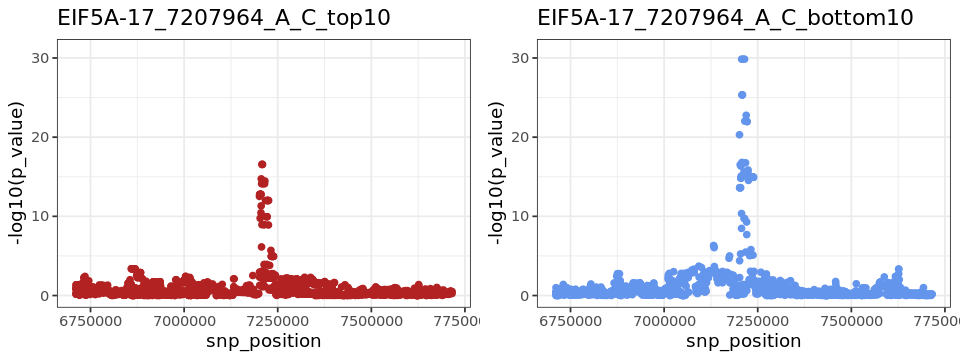

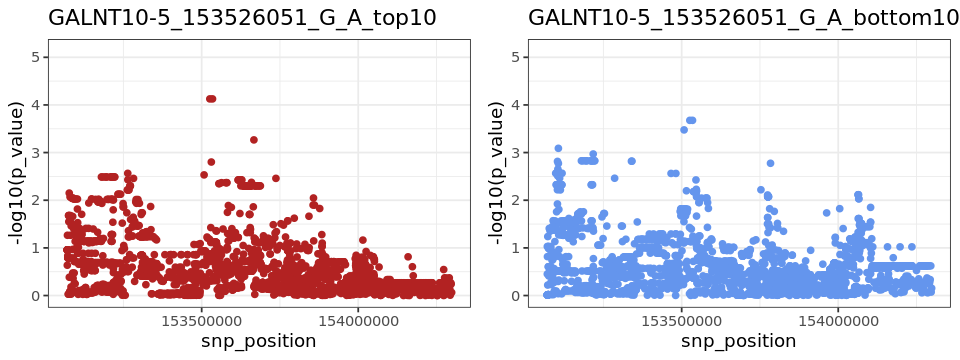

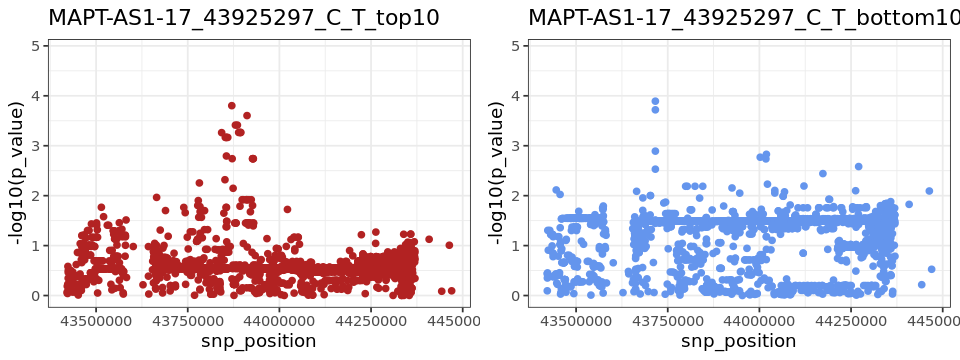

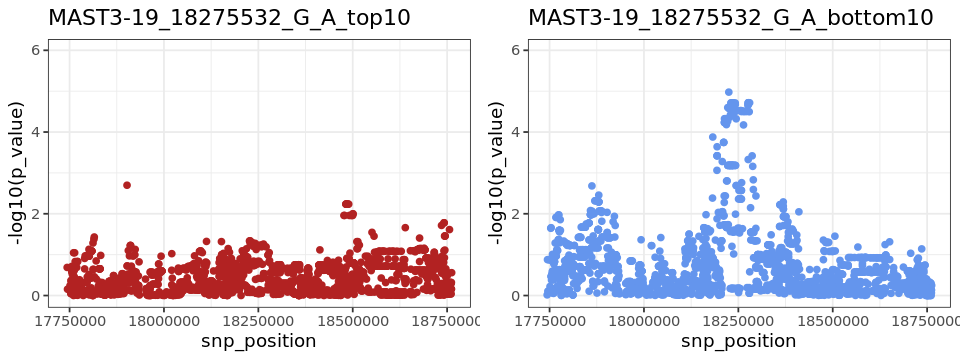

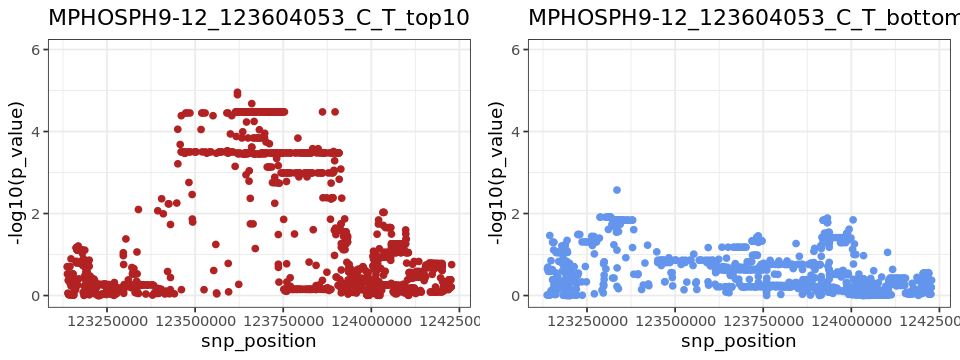

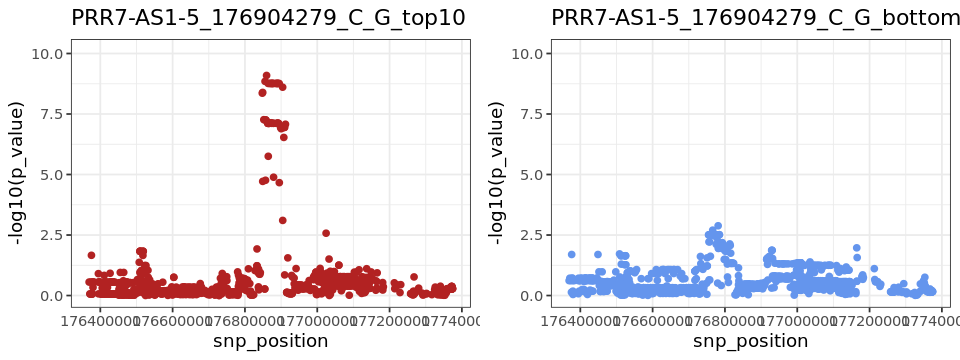

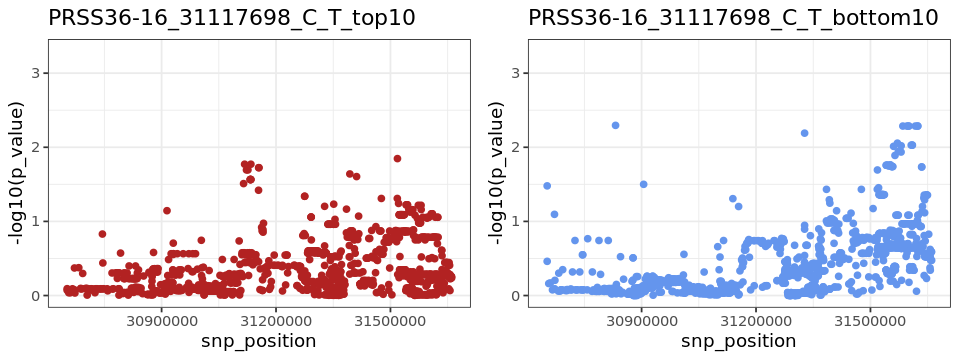

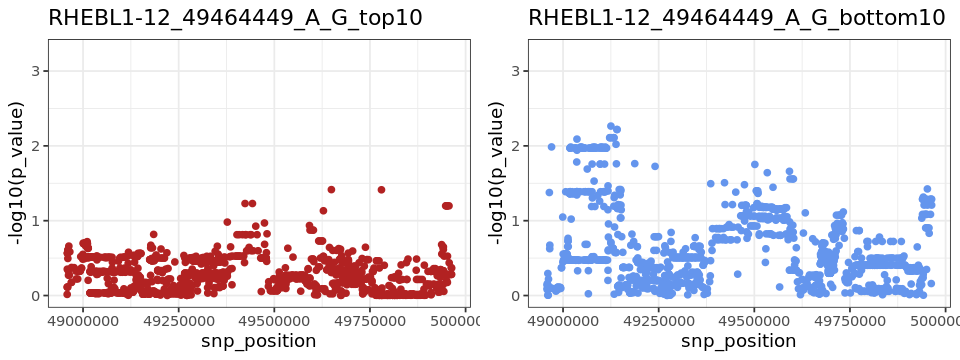

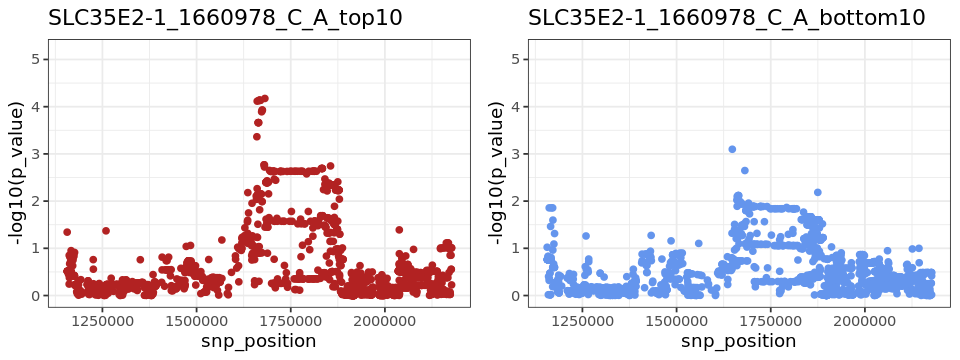

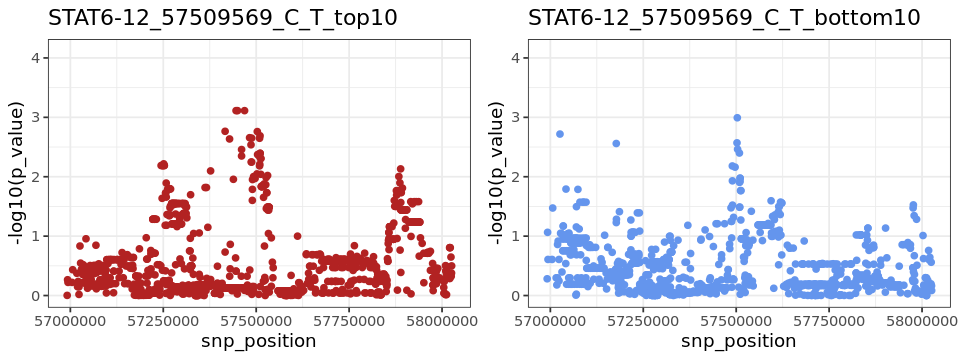

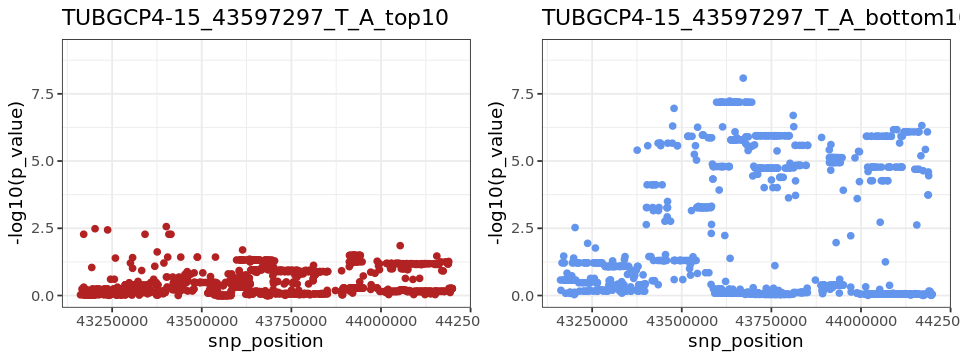

In [5]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/"
mydirs = list.files(mydir)
options(repr.plot.width = 8, repr.plot.height = 3)
for (i in 1:length(genes)){
# for (i in 6:13){
    gene_id = genes[i]
#     print(gene_id)
    gene_name = as.character(df_coloc[df_coloc$ensembl_gene_id == gene_id,"gene"][1])
#     print(gene_name)
    myfiles = mydirs[grep(paste0("input_files_",gene_name), mydirs)]
#     print(myfiles)
    filename_top = paste0(mydir,myfiles[2],"/results/qtl_results_all.txt")
#     print(filename_top)
    filename_bottom = paste0(mydir,myfiles[1],"/results/qtl_results_all.txt")
#     print(filename_bottom)
    df_top = read.csv(filename_top,sep="\t")
    df_to_plot1 = df_top[df_top$feature_id %in% gene_id,]
    m1 = min(df_to_plot1$p_value)
    df_bottom = read.csv(filename_bottom,sep="\t")
    df_to_plot2 = df_bottom[df_bottom$feature_id %in% gene_id,]
    m2 = min(df_to_plot2$p_value)
    m = -log10(min(m1,m2))+1
    p_top = ggplot(df_to_plot1, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="firebrick") + theme_bw() + ylim(c(0,m))
    p_bottom = ggplot(df_to_plot2, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="cornflowerblue") + theme_bw() + ylim(c(0,m))
    p_top = p_top + ggtitle(gsub("quantile","",gsub("input_files_","",myfiles[2])))
    p_bottom = p_bottom + ggtitle(gsub("quantile","",gsub("input_files_","",myfiles[1])))
    print(plot_grid(p_top, p_bottom, ncol=2))
}

In [27]:
gene = genes[5]
gene

[1] "ENSG00000264589"

In [ ]:
################################ 
#### MAPT-AS1 (ENSG00000264589)

In [33]:
#### DA scRegMap top population
filename_top = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/input_files_MAPT-AS1-17_43925297_C_T_top10quantile/results/qtl_results_all.txt"
df_top = read.csv(filename_top,sep="\t")

In [118]:
df_to_plot = df_top[df_top$feature_id %in% gene,]
# ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="cornflowerblue") + theme_bw() + ylim(c(0,10))

In [119]:
#### DA scRegMap bottom population
# filename_bottom = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/input_files_MAPT-AS1-17_43925297_C_T_bottom10quantile/results/qtl_results_all.txt"
# df_bottom = read.csv(filename_bottom,sep="\t")

In [ ]:
df_to_plot = df_bottom[df_bottom$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="firebrick") + theme_bw() + ylim(c(0,10))

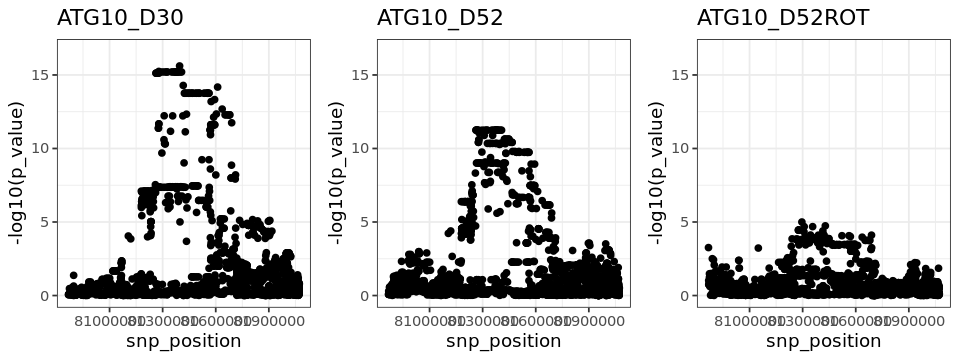

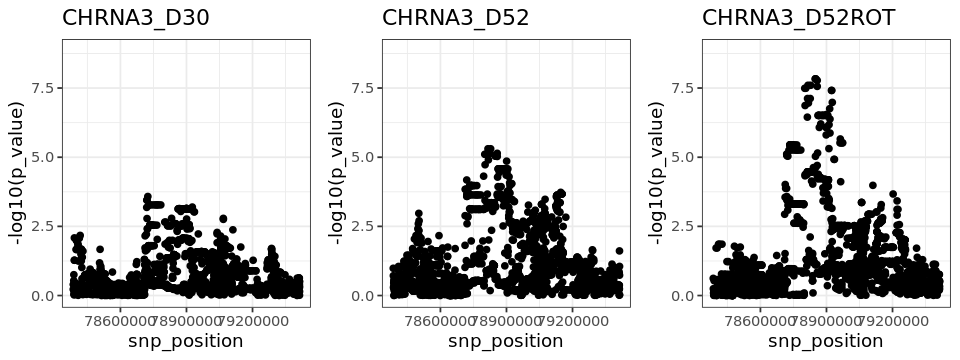

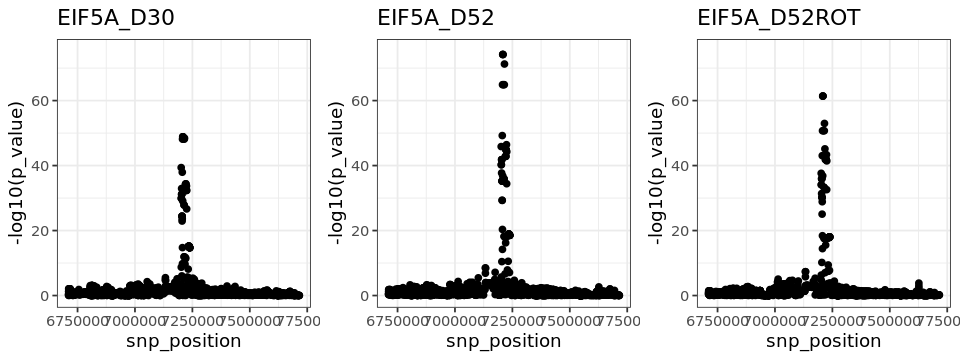

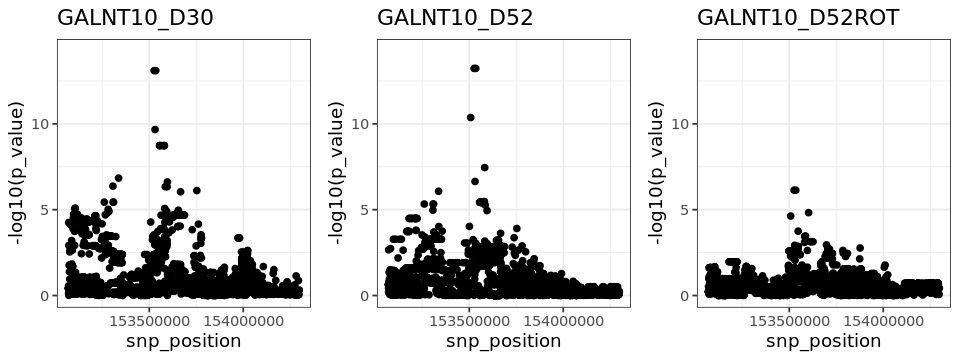

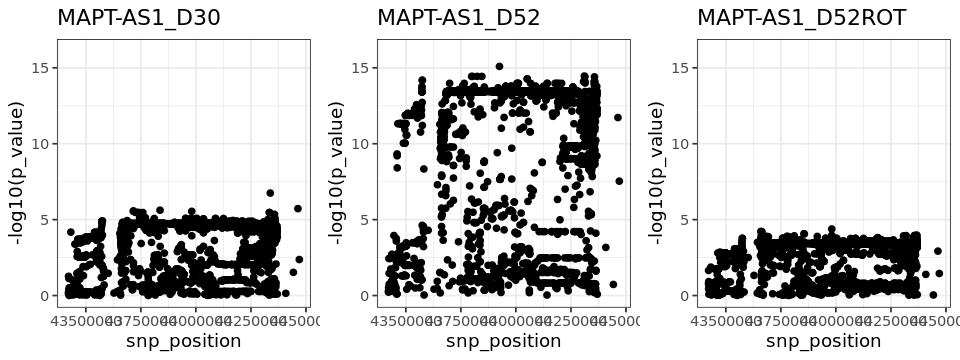

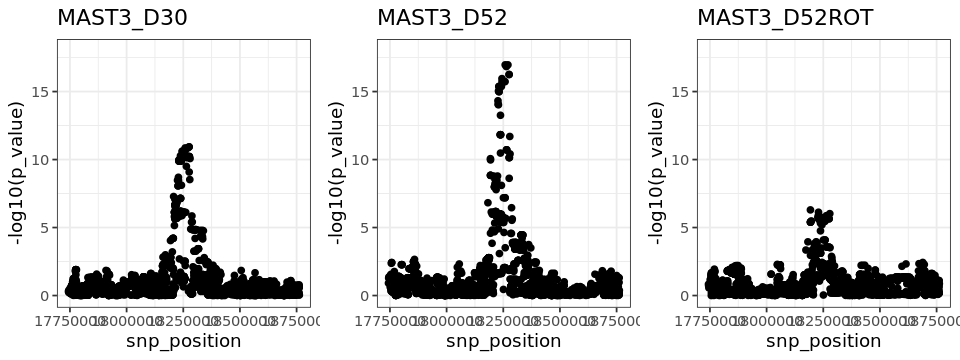

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

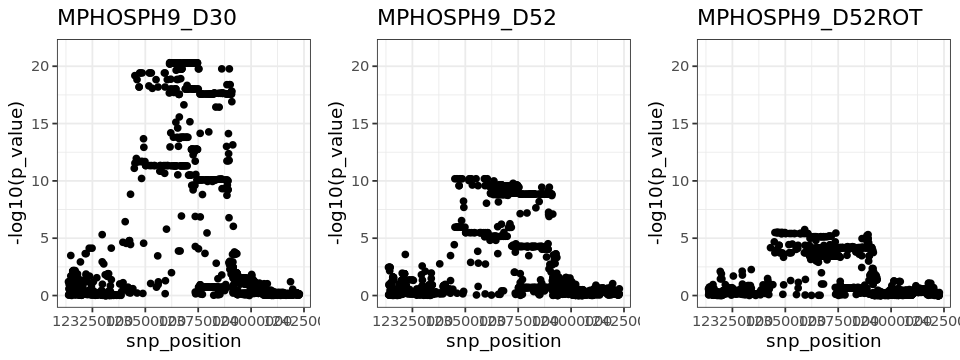

Warning message in min(df_to_plot$p_value):
“no non-missing arguments to min; returning Inf”

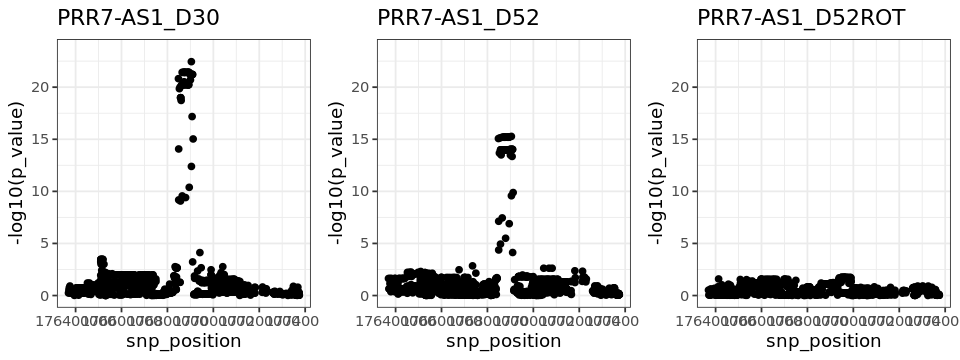

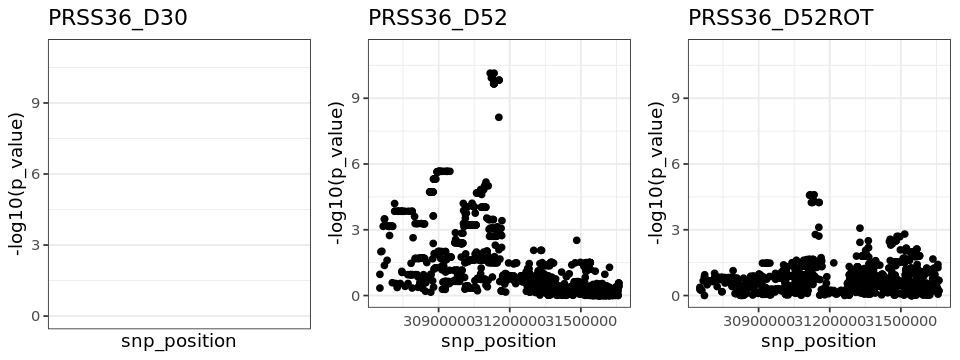

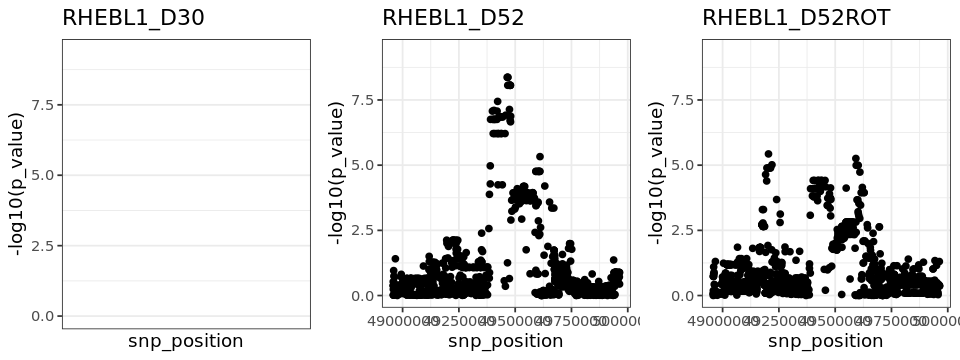

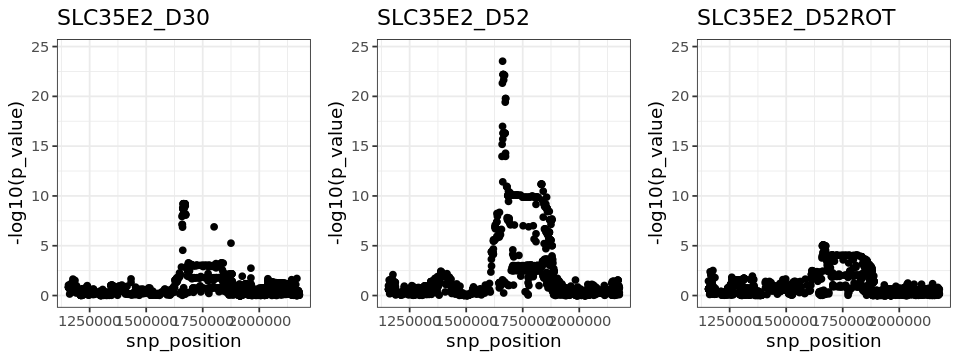

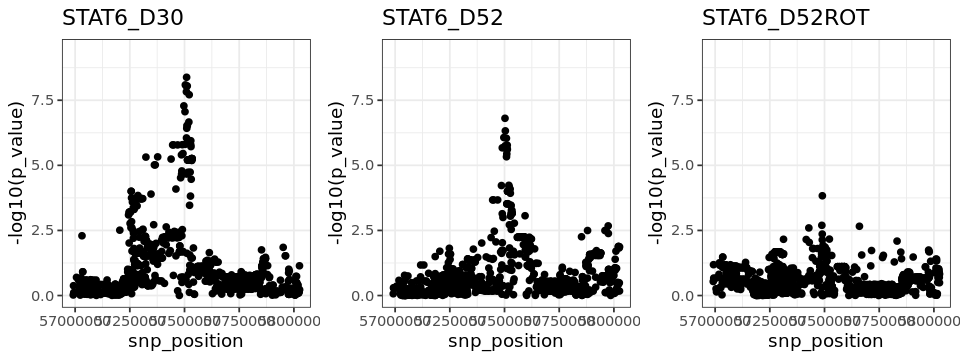

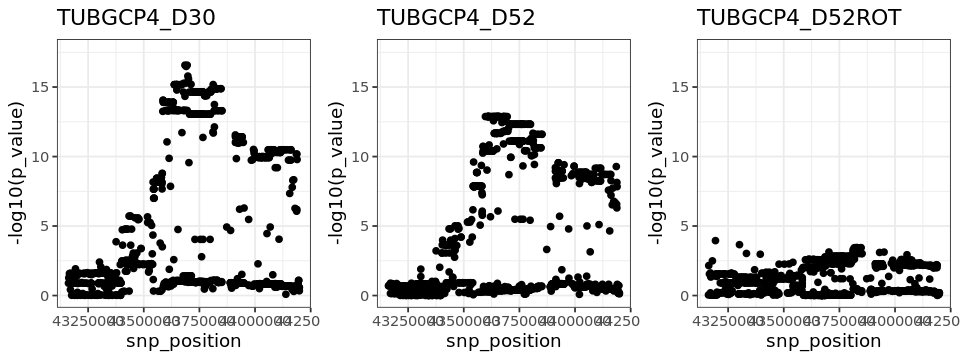

In [117]:
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/"
mydirs = list.files(mydir)
options(repr.plot.width = 8, repr.plot.height = 3)
for (i in 1:length(genes)){
    gene_id = genes[i]
    gene_name = as.character(df_coloc[df_coloc$ensembl_gene_id == gene_id,"gene"][1])
    df_to_plot = df0[df0$feature_id %in% gene_id,]
    m0 = min(df_to_plot$p_value)
    p0 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    df_to_plot = df1[df1$feature_id %in% gene_id,]
    m1 = min(df_to_plot$p_value)
    p1 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    df_to_plot = df2[df2$feature_id %in% gene_id,]
    m2 = min(df_to_plot$p_value)
    p2 = ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() 
    m = -log10(min(m0,m1,m2))+1
    p0 = p0 + ggtitle(paste0(gene_name, "_D30")) + ylim(c(0,m))
    p1 = p1 + ggtitle(paste0(gene_name, "_D52")) + ylim(c(0,m))
    p2 = p2 + ggtitle(paste0(gene_name, "_D52ROT")) + ylim(c(0,m))
    print(plot_grid(p0, p1, p2, ncol=3))
}

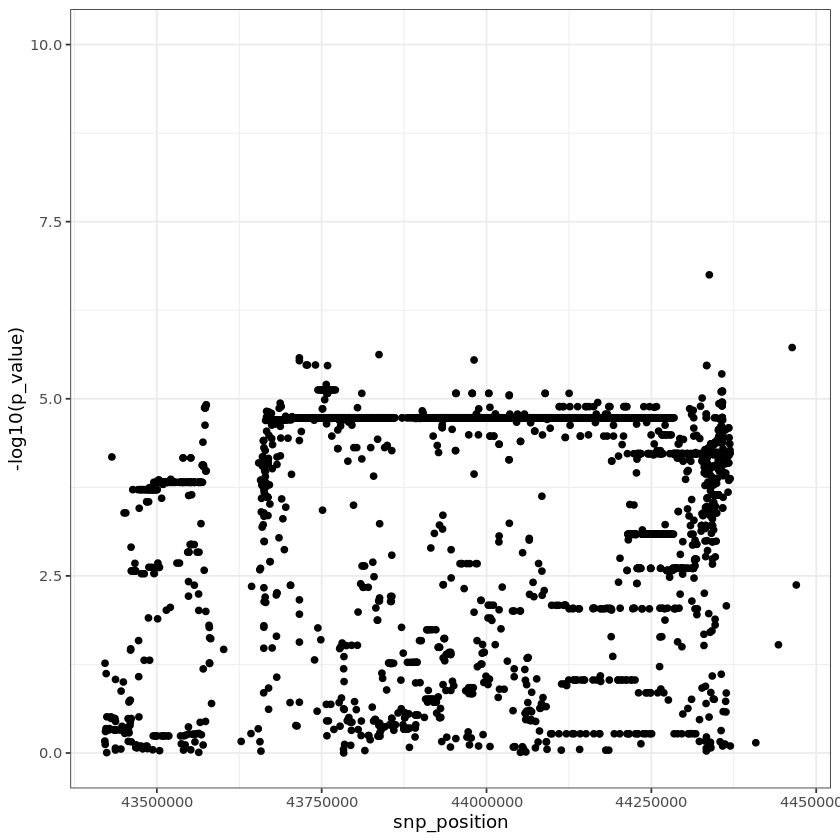

In [30]:
df_to_plot = df0[df0$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))

Warning message:
“Removed 3047 rows containing missing values (geom_point).”

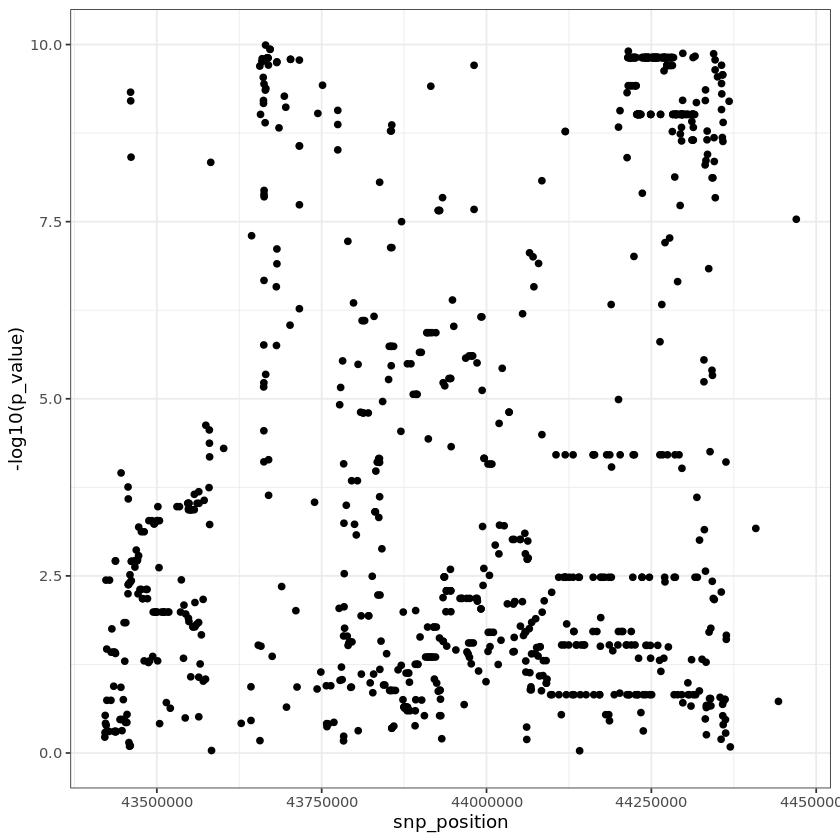

In [31]:
df_to_plot = df1[df1$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))

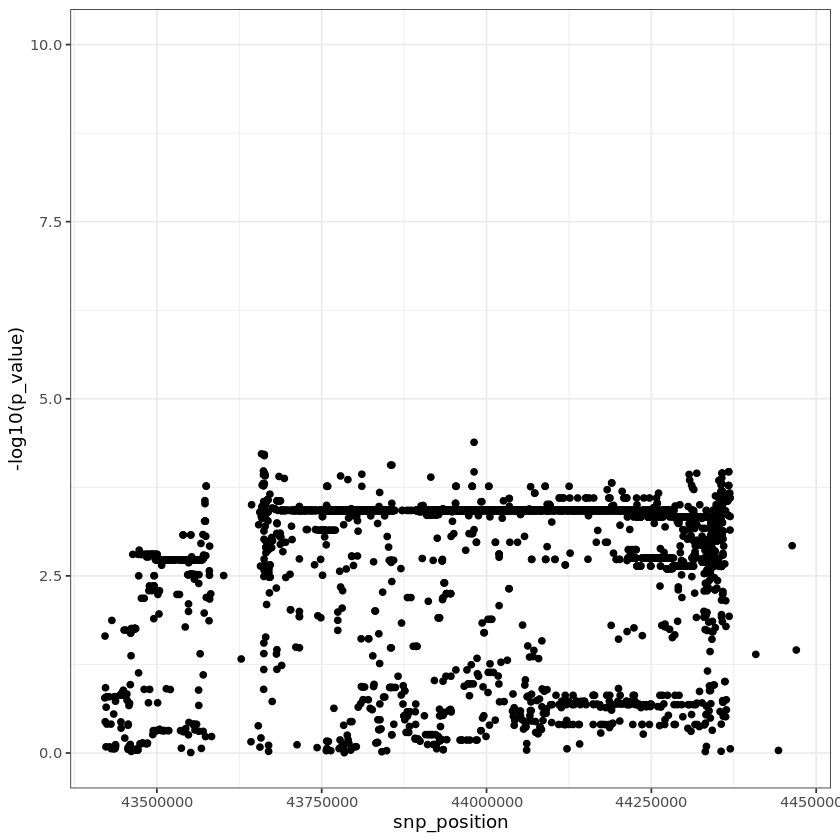

In [32]:
df_to_plot = df2[df2$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))

In [8]:
################################ 
#### MPHOSPH9 (ENSG00000051825)

In [23]:
#### DA scRegMap top population
filename_top = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/input_files_MPHOSPH9-12_123604053_C_T_top10quantile/results/qtl_results_all.txt"
df_top = read.csv(filename_top,sep="\t")

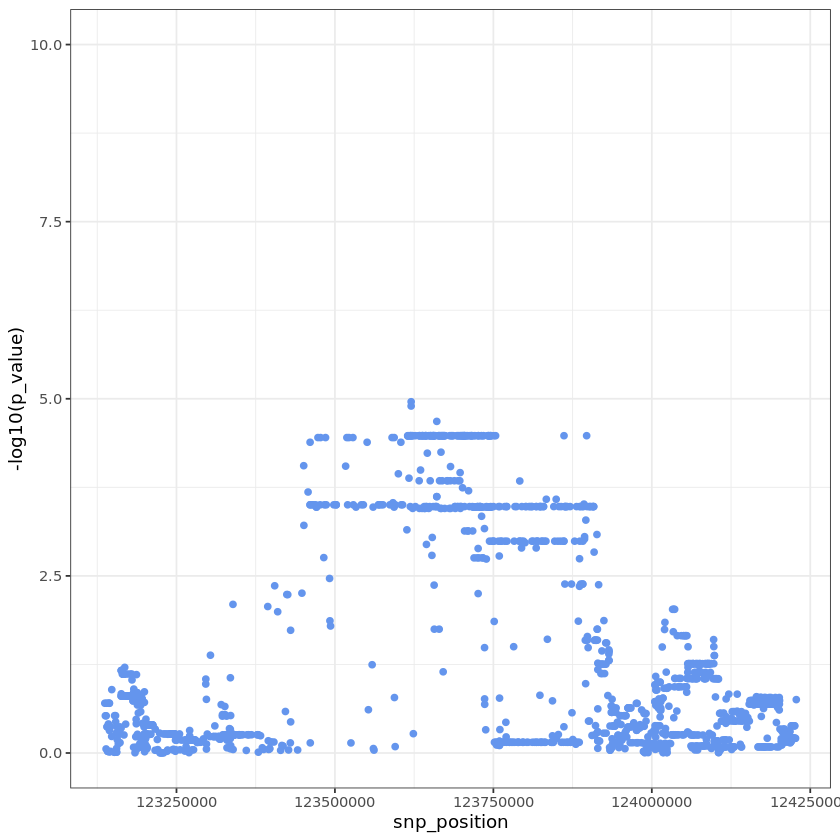

In [24]:
df_to_plot = df_top[df_top$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="cornflowerblue") + theme_bw() + ylim(c(0,10))

In [25]:
#### DA scRegMap bottom population
filename_bottom = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/da_coloc_GxC/input_files_MPHOSPH9-12_123604053_C_T_bottom10quantile/results/qtl_results_all.txt"
df_bottom = read.csv(filename_bottom,sep="\t")

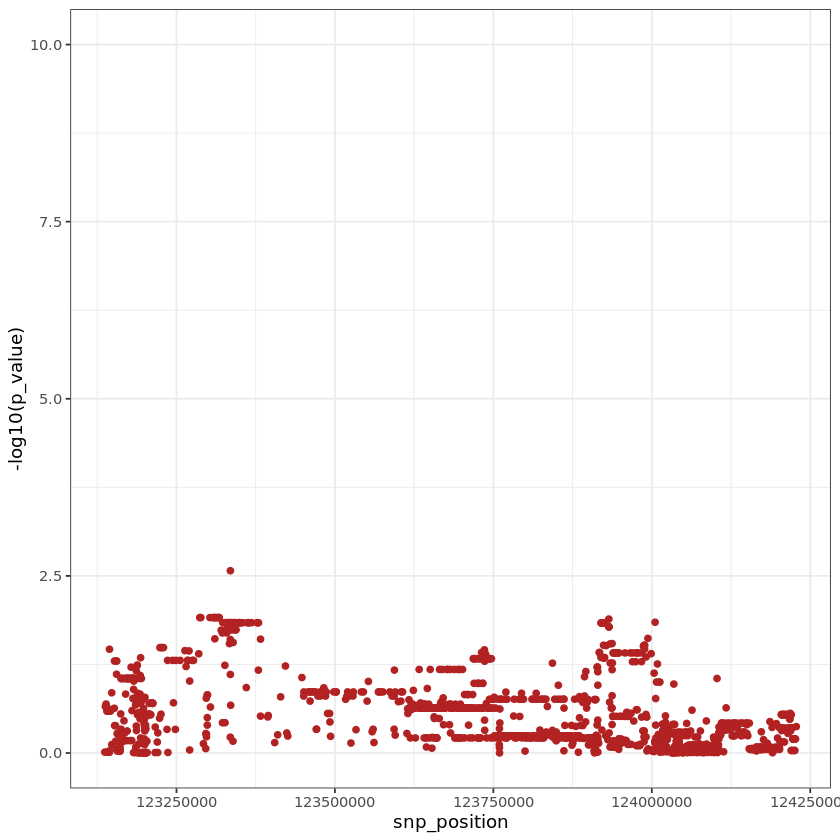

In [26]:
df_to_plot = df_bottom[df_bottom$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point(col="firebrick") + theme_bw() + ylim(c(0,10))

In [15]:
#### DA day 30
filename0 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/qtl_analysis/eqtl_discovery/celltype_DA/summary_stats/pool1_13_noddd_D30.DA.qtl_results_all.txt"
# df0 = read.csv(filename0,sep="\t")

Warning message:
“Removed 342 rows containing missing values (geom_point).”

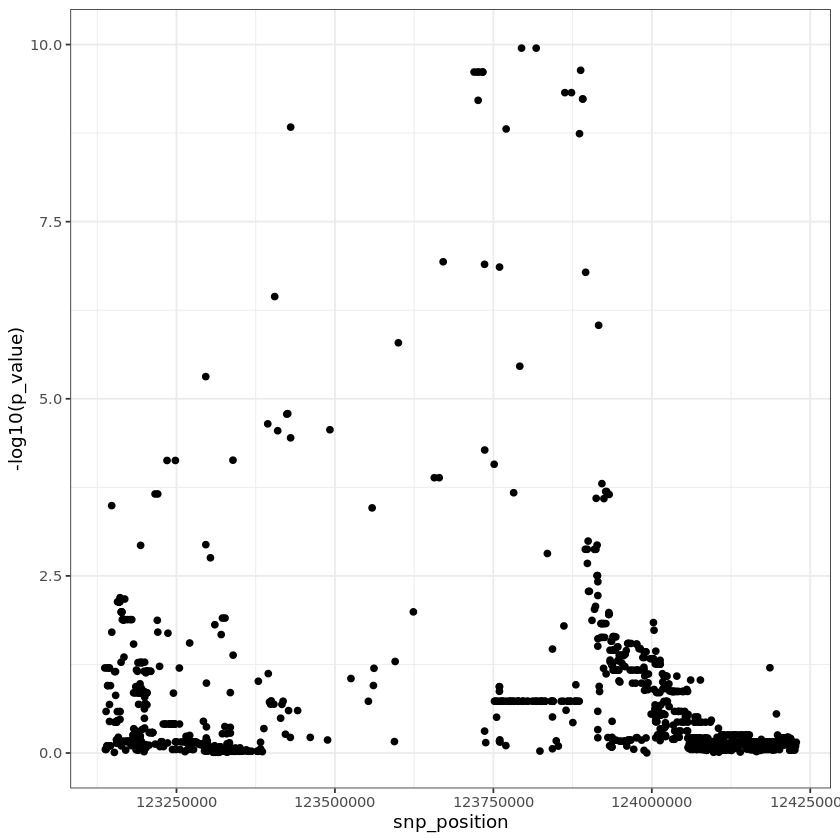

In [16]:
df_to_plot = df0[df0$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))

In [11]:
#### DA day 52
filename1 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/summary_stats/pool1_17_D52.DA.qtl_results_all.txt"
# df1 = read.csv(filename1,sep="\t")

In [14]:
# df1[df1$feature_id %in% gene,]

Warning message:
“Removed 13 rows containing missing values (geom_point).”

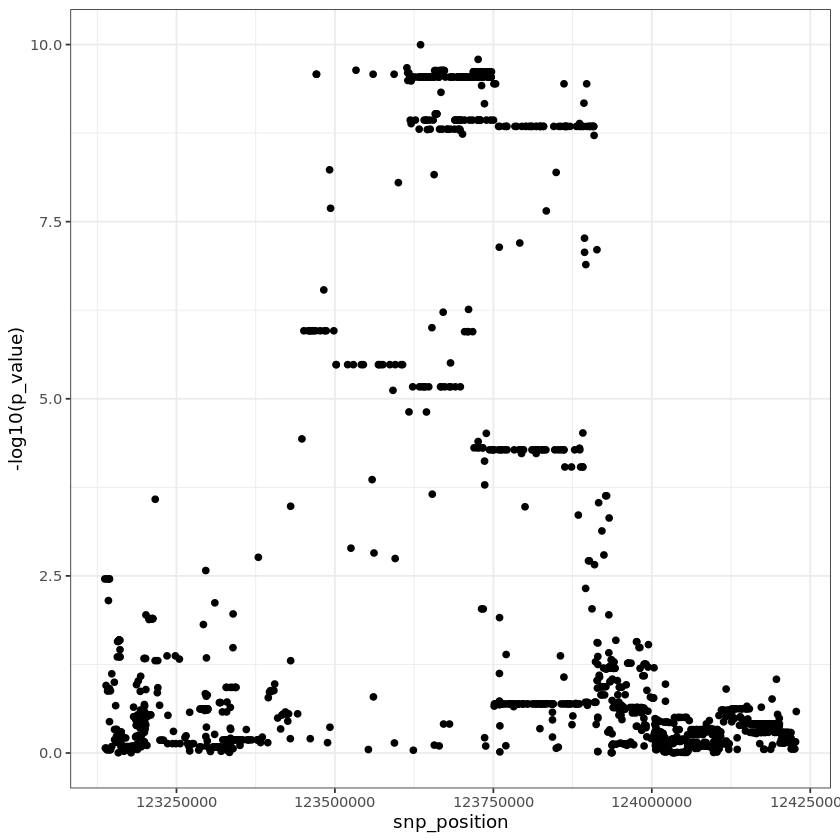

In [13]:
df_to_plot = df1[df1$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))

In [43]:
#### DA day 52 rotenone-treated

In [17]:
filename2 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_ROT_treated/celltype_DA/summary_stats/pool1_17_D52.DA.qtl_results_all.txt"
# df2 = read.csv(filename2,sep="\t")

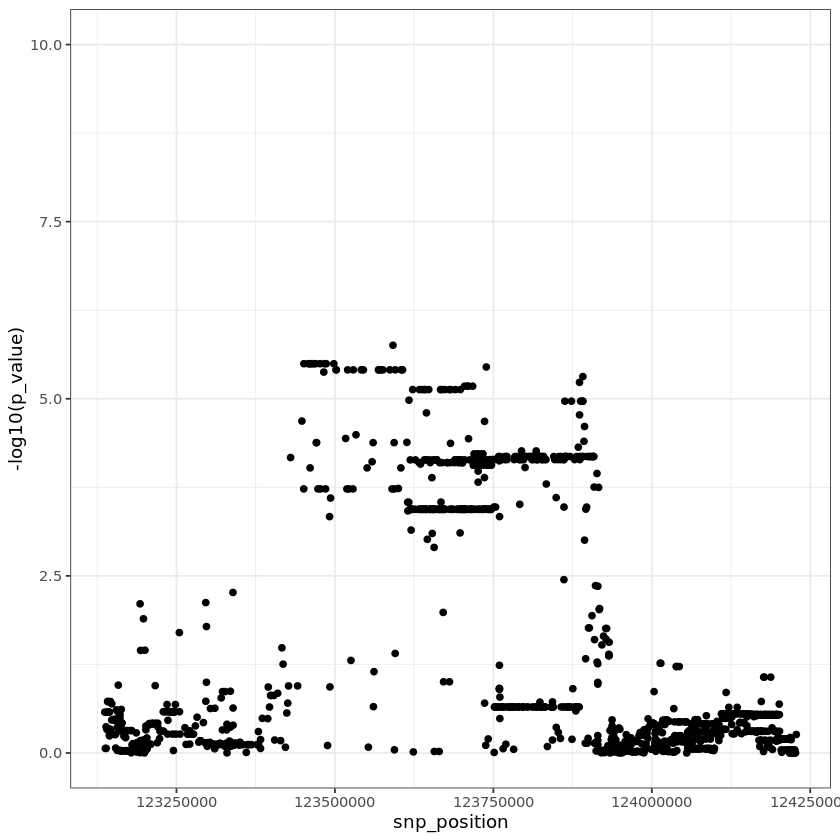

In [18]:
df_to_plot = df2[df2$feature_id %in% gene,]
ggplot(df_to_plot, aes(x=snp_position,y=-log10(p_value))) + geom_point() + theme_bw() + ylim(c(0,10))